# **Workshop: Introduksjon til analyse, visualisering og modellering**

**Du vil lære:**
- Helt overordnet hva data og analyse er, hva det innebærer og hvordan det utføres i praksis
- Å hente ut og jobbe med data fra Google BigQuery
- Hvordan gå frem for å utforske og tolke et nytt datasett og et nytt forretningsdomene
- Enkel modellering og visualisering

**Du vil _ikke_ lære:**
- Avansert maskinlæringsmodellering
- Spesifikke detaljer om verktøy som Pandas, Matplotlib, Keras, Tensorflow og liknende
- Hvordan benytte modeller og analyse i et integrert, kjørende system
- Hvordan løse domenespesifikke og vanskelige problem på en enkel og generisk måte

## Introduksjon
Analyse, modellering og maskinlæring er store temaer som ikke kan dekkes hverken overfladisk eller dypt i én enkelt workshop. Likevel skal vi gjøre et forsøk på å introdusere noen sentrale elementer, samt få litt hands-on erfaring med et utvalgt datasett. Dataen vi skal se på stammer fra Oslo Bysykkel, og inneholder informasjon om turer fra April 2019 til April 2022. I tillegg er værdata introdusert som en potensielt interessant ytre faktor.

# **Bolk 1: Laste data fra BigQuery**
Før vi kan begynne med analyse må vi være i stand til å laste inn dataen i vårt foretrukne verktøy. For data lagret i moderne skytjenester, som f.eks Google BigQuery, har vi verktøy som gjør uthenting enklere. Med disse verktøyene kan vi importere data direkte i vårt _Python_-script. I oppgavene under benytter vi et Python-bibliotek fra Google for å integrere med BigQuery.

## **Oppgave 1.1: Autentisering mot Google**
Før vi kan laste data fra Google sine tjenester er vi nødt til å autentisere vår Colab Notebook til å ha de riktige rettighetene. Kjør kodesnutten nedenfor og gjennomfør autentiseringen. 

> **NB: Husk å velge riktig Google-konto i nettleserfanen din, dvs. den som har tilgang til BigQuery-tabellen som skal benyttes**

In [ ]:
# Autentisering mot Google, slik at dette Colab-dokumentet
# har tilgang til andre Google-tjenester knyttet til din konto
# f.eks BigQuery-tabeller, Storage buckets osv.
from google.colab import auth
auth.authenticate_user()

## **Oppgave 1.2: Uthenting av data fra BigQuery**
Nedenfor finner du en hjelpemetode for å laste data fra Google BigQuery, som deretter kalles og instansierer en Pandas DataFrame _df_. Last inn dataen ved å kjøre kodeblokken. Lastingen er vellykket dersom blokka printer ut fem velformaterte linjer med data.

> **NB: Vi skal laste en del data, så det kan ta alt fra 10 sekunder til et minutt å kjøre metoden under**

In [ ]:
# Eksterne avhengigheter
from google.cloud import bigquery_storage
from google.cloud.bigquery_storage import types
from google.cloud.bigquery_storage_v1 import enums
import pandas

#  params:
#   project_id: String
#   dataset_id: String
#     table_id: String
# 
#  return:
#           df: Pandas DataFrame
#
def load_bigquery_data(project_id, dataset_id, table_id):
    # Parse input-verdier til forventet filsti på Google BigQuery
    table = f"projects/{project_id}/datasets/{dataset_id}/tables/{table_id}"
    parent = "projects/{}".format(project_id)

    # Instansier klient for enkel integrasjon mot BigQuery
    bqstorageclient = bigquery_storage.BigQueryReadClient()

    # Opprett en read-session mot en tabell i BigQuery
    requested_session = types.ReadSession(
        table=table,
        data_format = enums.DataFormat.ARROW
    )
    read_session = bqstorageclient.create_read_session(
        parent=parent,
        read_session=requested_session,
        max_stream_count=1,
    )

    # Les data fra BigQuery, putt i en liste med dataframes
    stream = read_session.streams[0]
    readRowsStream = bqstorageclient.read_rows(stream.name)
    dfs = []
    for page in readRowsStream.rows(read_session).pages:
        dfs.append(page.to_dataframe())

    # Sett flere dataframes sammen til én
    df = pandas.concat(dfs)

    return df

df = load_bigquery_data("data-intro", "bysykkel_main", "bysykkel_med_værdata")
df["weekday"] = df["started_at"].dt.day_name() # Vi introduserer en ny kolonne, ikke noe å bry seg om ;)
df.head()

Ved analyse av data i Python bruker man gjerne et bibliotek som heter *Pandas*. Data i Pandas representeres med en *DataFrame*, ofte forkortet og instansiert som bare *df*. Dataen vi får lastet inn med bigquery_storage-klienten i kodesnutten nedenfor er på et eget Google-format *ReadRowsStream*, som tilbyr en *to_dataframe()*-metode. Denne metoden gir oss en Pandas DataFrame.

# **Bolk 2: Innledende utforskning**
I innledende fase av et data- og analyseprosjekt er det essensielt å forstå hva forretningsbehovet er, og hva datagrunnlaget inneholder. Allerede da vil en kunne besvare noen sentrale spørsmål innen analyse:
- Er datagrunnlaget tilstrekkelig for å gjøre de analysene vi ønsker?
- Er det vesentlige mangler eller rariteter i datagrunnlaget?
- Hva vi tilstrekkelig forståelse av hvor dataen kommer fra, hvilke enheter og betydning hver kolonne har, og sammenhengen mellom kolonnene?
- Hvilke transformasjoner kan være nyttige å gjøre? Hvilke nye, utledede kolonner kan være nyttige å introdusere?
- Hvilke visualiserings- og modelleringsteknikker kan være aktuelle?

Vi skal forsøke oss på å finne ut av og gjøre _noen_ av disse tingene. I tillegg skal vi lære litt Pandas-spesifikke kommandoer.

## **Oppgave 2.1: Innebygde df-kommandoer**
På en DataFrame-instans _df_ har vi en rekke nyttige metode og felter, f.eks:

```python
df.shape      # Dimensjon
df.info()     # Oppsummering av størrelse og innhold
df.describe() # Grunnleggende statistiske egenskaper
df.head()     # Lister de første radene i datasettet
df.tail()     # Lister de siste radene i datasettet
```

Bruk kommandoene over til å utforske datasettet du har lastet inn i forrige oppgave

a) Hvor mange rader og hvor mange kolonner inneholder datasettet?

b) Hva tror du enhet for kolonnene "duration", "mean_temperature" og "precipitation_amount" er?

c) Hva er gjennomsnittlig varighet på en bysykkeltur?

In [ ]:
# TODO
# Din kode her

In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
Svar C:
"""

In [ ]:
#@title Løsning Oppgave 2.1

"""
Svar A: Bruk df.shape eller df.info() - 5715392 rader, 16 kolonner
Svar B: varighet (s), temperatur (C), nedbør (mm)
Svar C: Bruk df.describe() - 781.3112 sekunder
"""

## **Oppgave 2.2: Filtrering og transformasjon**
Vi kan utføre en rekke operasjoner på en DataFrame, bl.a. filtere, transformere, fjerne, legge til, plotte, og mye mer. Videre følger noen eksempler som er relevante for akkurat denne workshopen.

**Filtrere basert på kolonneverdier**:
```python
df[
  (df["x"] > a & df["y"] < b) |
  df["z"] > c
]
```

**Gruppere data på kolonnerverdi**:
```python
df.groupby(
  df["nrOfApartments"]
)
```

Vi kan finne størrelsen på hver gruppe med bruk av _.size()_-funksjonen:
```python
df.groupby(
  df["nrOfApartments"]
).size()
```

Bruk kommandoene over til å svare på følgende:

a) Hvor mange turer ble gjennomført i hele 2021?

b) Hvor mange unike holdeplasser er det?

In [ ]:
# TODO
# Din kode her

In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
"""

In [ ]:
#@title Løsning Oppgave 2.2

# A)
df[(df["started_at"] > '2020-12-31') & (df["ended_at"] < '2022-01-01')].shape

# B)
df.groupby(df["start_station_id"]).size()

"""
Svar A: 1420010
Svar B: 275
"""

## **Oppgave 2.3: Visualisering**
For visualisering av data er det vanlig å bruke et bibliotek som heter Matplotlib. I denne workshoppen klarer vi oss med å benytte Pandas sin _plot_-funksjon (som også benytter Matplotlib).

Hvilke type plott en bør velge avhenger av hva en ønsker å visualisere. Noen eksempler:
- **bar** (sammenlikne grupperte verdier, f.eks antall sykkelturer per år)
- **pie** (samme som over, men med en litt annen visualisering)
- **scatter** (sammenlikne to ulike kolonneverdier, f.eks sammenhengen mellom temperatur og nedbør)
- ... og flere andre som vi ikke går inn på nå

Argumentet _figsize_ kan settes for å endre størrelse på visualiseringen

**Bar-plot:**
```python
df.groupby(
  df["some_column"]
).size().plot(kind="bar", figsize=(20, 6))
```
Erstatt _"bar"_ med _"pie"_ for tilsvarende pie-plot

**Scatter-plot:**
```python
df.plot(kind="scatter", x="some_column_1", y="some_column_2")
```

a) Lag et stolpediagram over antall turer *fra* de ti mest populære holdeplassene.

> **Hint:** du kan sortere resultatet av et kall til .size()-funksjonen og hente de N første radene med ```size().sort_values(ascending=False)[:N]```  

b) Lag et spredningsplott med longitude og latitude for startholdeplassen på hhv. x- og y-aksen

> **Hint:** Å scatter-plotte alle radene i hele _df_ vil ta lang tid. Vi er kun interessert i ett punkt for hver holdeplass. Bruk derfor ```df.drop_duplicates(subset=["start_station_id"])``` før kallet til plot-funksjonen

c) Åpne kart over Oslo Bysykkel [sine holdeplasser](https://oslobysykkel.no/stasjoner). Ser du noen likheter med scatter-plottet fra oppgave b?

In [ ]:
# TODO
# Din kode her, oppgave a)

In [ ]:
# TODO
# Din kode her, oppgave b)

In [ ]:
#@title Løsning Oppgave 2.3

# A)
df.groupby(
  df["start_station_name"]
).size().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6))

# B)
df.drop_duplicates(subset=["start_station_id"]).plot(
  kind="scatter",
  y="start_station_latitude",
  x="start_station_longitude"
)

## **Oppgave 2.4: Introdusere nye kolonner**
Ofte kan det være nyttig å introdusere nye kolonner. Nedenfor følger eksempelkode på nettopp dette, der det introduseres en kolonne "weekday":

> **NB: Du trenger ikke kjøre koden under, da vi allerede har gjort nettopp dette på en litt raskere måte tidligere ;)**  

```python
# Hjelpemetode for å hente ut navnet på en ukedag
import datetime
import calendar
def weekday_from_datetime(dt):
  return calendar.day_name[
    datetime.date(day=dt.day, month=dt.month, year=dt.year).weekday()
  ]

# Lager ny kolonne i df med navn "weekday"
# axis=1 betyr at metoden utføres for alle rader
df["weekday"] = df.apply(
  lambda row: weekday_from_datetime(row["started_at"]),
  axis=1
)
```

a) Vi ønsker å introdusere to nye kolonner i datasettet. Hjelpemetodene i kodeblokka under er hint om hvilke. Gi metodene nye, mer logiske navn. Kjør deretter kodeblokka

> **NB: For denne oppgaven definerer vi et redusert datasett _df\_2021\_june_, ettersom kommandoene tar for lang tid på hele datasettet _df_**

In [ ]:
import geopy.distance
# TODO: rename
def mystical_method_1(x1, y1, x2, y2):
  loc_1 = (x1, y1)
  loc_2 = (x2, y2)
  return geopy.distance.geodesic(loc_1, loc_2).meters

# TODO: rename
def mystical_method_2(m, s):
  return m / s

# Vi henter ut data for juni 2021
df_2021_june = df[
    (df["started_at"] > '2021-06-01') &
    (df["ended_at"] < '2021-07-01')
]

b) Introduser de to nye kolonnene i *df_2021_june*, med hjelp av metodene du navnga over.

> **NB: Det kan ta et par minutter å introdusere de nye kolonnene, selv med det reduserte datasettet**

In [ ]:
# TODO
# Din kode her
# Husk å bruke df_2021_june istedenfor df

In [ ]:
#@title Løsning Oppgave 2.4

# mystical_method_1 gir distanse i luftlinje mellom to punkter
# mystical_method_2 gir gjennomsnittsfart, dvs. strekning delt på tid, med enhet meter pr sekund

df_2021_june["straight_line_distance_m"] = df_2021_june.apply(
  lambda row: mystical_method_1(
    row.start_station_latitude,
    row.start_station_longitude,
    row.end_station_latitude,
    row.end_station_longitude
  ),
  axis=1
)

df_2021_june["avg_speed"] = df_2021_june.apply(
  lambda row: mystical_method_2(
    row["straight_line_distance_m"],
    row["duration"]
  ),
  axis=1
)

df_2021_june.head()

# **Bolk 3: Enkel analyse av grafer**
Analyse innebærer gjerne å omforme, gruppere og/eller filtrere data, for så å visualisere den, i håp om å besvare aktuelle spørsmål. I denne bolkenjobber vi med noen enkle analyseoppgaver. 

> NB: Det er **ikke** viktig å forstå selve Python-koden for de kommende oppgavene i detalj



## **Oppgave 3.1: Turer per time av døgnet**
Kodeblokka under plotter antall turer hver time og for hvert år for hele datasettet. Kjør den, og svar på følgende:

a) Hvilke timer på hhv. formiddagen og etttermiddagen er det flest turer? Virker dette logisk? Eventuelt hvorfor/hvorfor ikke?

b) Antall turer i 2020 og 2021 er en del lavere enn i 2019. Hvorfor?

c) Antall turer i 2022 er drastisk lavere enn tidligere år. Hvorfor?

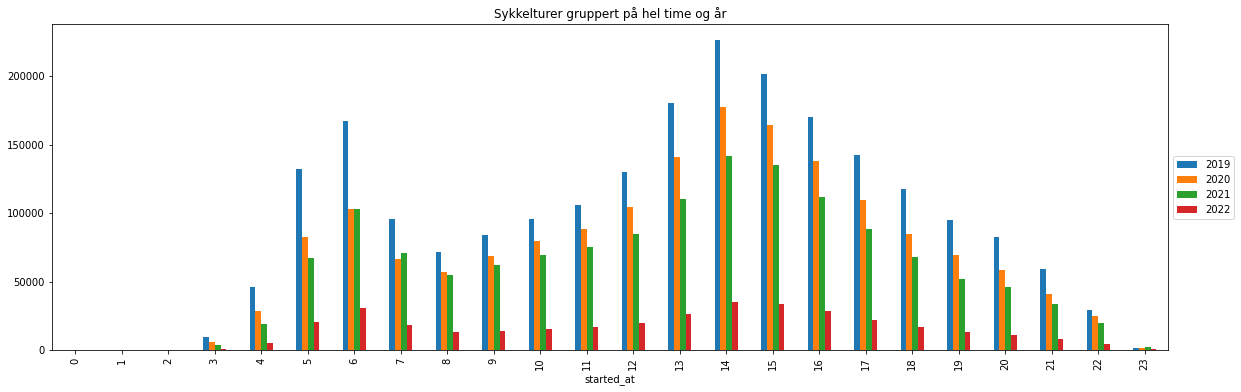

In [ ]:
df.groupby([df["started_at"].dt.hour, df["started_at"].dt.year]) \
  .size() \
  .unstack() \
  .plot(kind="bar", figsize=(20,6), stacked=False, title="Sykkelturer gruppert på hel time og år") \
  .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
Svar C:
"""

In [ ]:
#@title Løsning Oppgave 3.1
"""
Svar A: Ikke logisk, bysykkel åpner kl. 05 og stenger kl. 01
        Se f.eks https://oslobysykkel.no/sporsmal-og-svar
        Er i UTC-tid (to timer bak)
Svar B: Pandemi + muligens videre utbredelse av elektriske sparkesykler
Svar C: Vi er ikke ferdig med 2022 enda, har bare data tom. april
"""

## **Oppgave 3.2: Turer til og fra Skuret**
Koden under produserer en graf over antall turer til og fra Vippetangen, gruppert på time på døgnet og retning.

a) Med stor grad av synsing, tror du ansatte i Bekk står for *ingen*, *lite*, *noe*, *betydelig* eller *all* trafikk med bysykkel til og fra Vippetangen? 

b) Hva tenker du om grafen under? Hvilke realiteter kan forklare eventuelle mønster du ser?

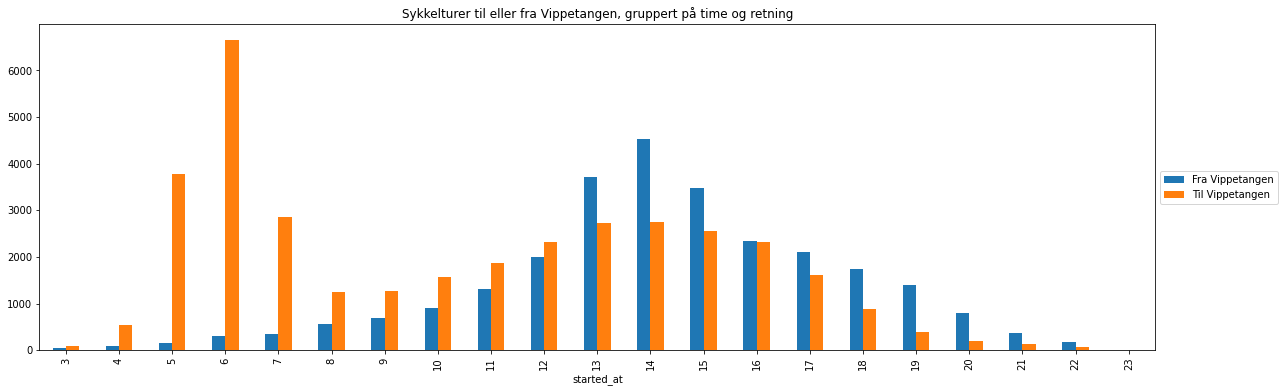

In [ ]:
df_vippetangen = df[
  (
    (df['end_station_name'].str.contains("Vippetangen vest") |
     df['end_station_name'].str.contains("Vippetangen øst"))
  ) |
  (
    (df['start_station_name'].str.contains("Vippetangen vest") |
     df['start_station_name'].str.contains("Vippetangen øst"))
  )
]

df_vippetangen.groupby([
    df_vippetangen["started_at"].dt.hour,
    (df_vippetangen['end_station_name'].str.contains("Vippetangen vest") | df_vippetangen['end_station_name'].str.contains("Vippetangen øst"))
  ]) \
  .size() \
  .unstack() \
  .plot(kind="bar", figsize=(20,6), stacked=False, title="Sykkelturer til eller fra Vippetangen, gruppert på time og retning") \
  .legend(["Fra Vippetangen", "Til Vippetangen"], loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
"""

In [ ]:
#@title Løsning Oppgave 3.2
"""
Svar A: Uten særlig grunnlag ville jeg sagt "noe"
        Det er flere andre arbeidsgivere o.l. i nærheten
        Andeler er nok større i enkelte tidsrom, og særlig på ukedager

Svar B: Trafikken til Vippetangen på morgenen stemmer bra med når en
        kan se for seg at folk kommer på jobb (mellom 7 og 9)

        Trafikken til tar seg opp igjen utover ettermiddagen. For Bekk
        spesifikt kan dette tenkes å ha sammenheng med at folk fra diverse
        prosjekter reiser til Skuret for å være med på ettermiddagsarrangement,
        faggruppemøter o.l.

        Trafikken fra Vippetangen er nokså normalfordelt rundt kl. 16.
        Dette stemmer godt med når folk drar fra jobb

        Det er viktig å presisere at datagrunnlaget ikke gir noe _bevis_
        for det som nevnes over, men kan være aktuelle sammenhenger
        å utforske videre om stemmer eller ikke.

        Andre faktoer enn Bekk kan også være i spill. F.eks er det
        vanlig at stativene på Vippetangen er nokså tomme på morgenen.
        Videre fylles bysykkelstativet opp utover morgenen, som gjør at
        man ikke får parkert flere sykler der før det tømmes igjen.
"""

## **Oppgave 3.3: Turer til og fra Skuret cont.**

I forrige oppgave fant vi (kanskje?) en viss indikasjon på at folk (og da også Bekkere) benytter bysykkel til og fra Vippetangen i forbindelse med jobb. I denne oppgaven skal vi forsøke å få ytterligere bevis for eller mot dette.

Koden under produserer to plott, som begge viser antall turer gruppert på ukedag og årstall:
- Første plott viser turer til Skuret mellom 7 og 9, og turer fra Skuret mellom 15 og 17
- Andre plott viser alle turer i hele Oslo, for hele døgnet

a) Sammenlikn de to plottene. Hvilke mønster (og særlig evt. avvikende mønster) ser du? Hva kan disse eventuelle møstrene indikere?

b) Vil du si at du har *ingen*, *lite*, *noe*, *betydelige* eller *sterke* indikasjoner på din konklusjon i oppgave a?

**NB: koden kan ta en minutt eller to å kjøre, det er mange rader som må prosesseres :)**

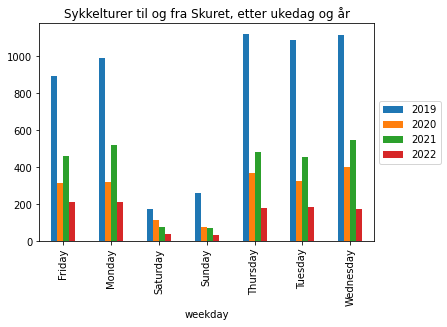

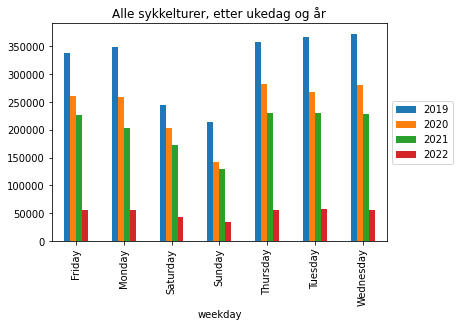

In [ ]:
df_vippetangen = df[
  (
    (df['end_station_name'].str.contains("Vippetangen vest") |
     df['end_station_name'].str.contains("Vippetangen øst")) &
    (df['ended_at'].dt.hour > 5) &
    (df['ended_at'].dt.hour < 7)
  ) |
  (
    (df['start_station_name'].str.contains("Vippetangen vest") |
     df['start_station_name'].str.contains("Vippetangen øst")) &
    (df['started_at'].dt.hour > 13) &
    (df['started_at'].dt.hour < 15)
  )
]

df_vippetangen.groupby(["weekday", df_vippetangen["started_at"].dt.year]) \
  .size() \
  .unstack() \
  .plot(kind="bar", stacked=False, title="Sykkelturer til og fra Skuret, etter ukedag og år") \
  .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  
df.groupby(["weekday", df["started_at"].dt.year]) \
  .size() \
  .unstack() \
  .plot(kind="bar", stacked=False, title="Alle sykkelturer, etter ukedag og år") \
  .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# TODO
# Dine svar her
"""
Svar A:
Svar B:
"""

In [ ]:
#@title Løsning Oppgave 3.3
"""
Svar A: Nedgangen fra 2019 til 2020 ser ut til å være vesentlig større
        for turer til og fra Vippetangen enn for øvrige turer.
        Fra 2020 til 2021 er det _oppgang_ for Vippetangen, samtidig
        som det er nedgang for øvrige turer.
        Ettersom Bekk (og flere andre arbeidsgivere i Oslo) hadde
        påbud om hjemmekontor i store deler av 2020 _kan_ dette
        være en indikasjon på at nedgangen skyldes bortfall av
        jobbplendlere

Svar B: Jeg ville sagt vi har "noe" indikasjoner. Differansen i
        nedgang er nokså stor, men vi har ingen overveldende
        bevis på hvorfor. Det er også noen noen motstridiger, eller
        i det minste rariteter, f.eks at nedgangen turer til og
        fra Skuret ser ut til å være prosentvis størst på søndager
"""

# Bolk 4: Enkel modellering

## **Oppgave 4.1: Lineær regresjon**
Frem til nå har vi lastet inn data og gjort noen enkle visualiseringer, transformasjoner og analyser. I den virkelige verden ønsker man ofte å bruke datagrunnlaget sitt for å bygge modeller som kan benyttes på ny data i fremtiden. Noen eksempler på slike modeller i vårt tilfelle er:
- En modell som kan predikere antall sykkelturer fra og til et stoppested basert på beliggenhet, forventet temperatur og forventet nedbør
- En modell som kan predikere tidspunkt på døgnet et stoppested går tom for sykler basert på antall reiser til og fra
- ... og mye annet

Å tilpasse og trene slike modeller med høy nøyaktighet og lav usikkerhet i resultatene kan være svært vanskelig. Hvilke type modeller som egner seg kan også variere stort, fra enkle matematiske modeller som lineær regresjon, til avanserte maskinlæringsmodeller som f.eks i selvkjørende biler.

I denne oppgaven skal vi trene en enkel lineær modell som predikerer luftavstanden mellom to holdeplasser basert på latitude og longitude. En slik modell er nødt til å ta inn en mengde verdier **X**, og returnere den predikerte avstanden **y**.

a) Hvilke kolonner bør inngå i **X**, og hvilke kolonner bør inngå i **y**?

In [ ]:
# TODO
# Svar B:

In [ ]:
#@title Løsning Oppgave 4.1 A

#  X: latitude og longitude for hhv. start- og stoppsted
#  y: straight_line_distance_m

b) Lag en ny dataframe, *df_mod*, som kun inneholder de aktuelle kolonnene, og som _ikke_ inneholder duplikate rader.

> **NB: Bruk df_2021_june som grunnlag, _ikke_ df**

In [ ]:
# TODO
# Din kode her
df_mod = ...

In [ ]:
#@title Løsning Oppgave 4.1 B

df_mod = df_2021_june[["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude", "straight_line_distance_m"]].drop_duplicates()

Koden under bruker et bibiliotek *sklearn* for å instansiere og tilpasse en enkel lineær modell. Prosessen er som følger:
- Definer en modell
- Del dataen opp i treningsdata (som skal brukes for å tilpasse modellen) og testdata (som skal brukes for å teste om modellen generaliserer til data den _ikke_ har blitt trent på)
- Tilpass modellen på treningsdata
- Test modellen på testdata
- Avgjør om modellen gjør en god jobb eller ikke, f.eks ved å regne ut noen metrikker

c) Kjør koden under. Se på verdien for "mean_absolute_error" som printes ut nederst. Dette er hvor mange meter modellen bommer med i gjennomsnitt per rad i testdataen. Er dette et godt eller dårlig resultat?

In [ ]:
df_mod = df_2021_june[["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude", "straight_line_distance_m"]].drop_duplicates()

# Vi definerer X (input) og y (output) som subset av data
X = df_mod[["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"]]
y = df_mod["straight_line_distance_m"]

# Vi bruker en hjelpemetode for å dele X- og y-data for trening og testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Vi instansierer og "trener" en lineær modell
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Vi bruker den ferdigtrente modellen til å predikere y-verdi for
# en mengde X-verdien modellen _ikke_ har blitt trent med
y_pred = model.predict(X_test)

# Vi regner ut en metrikk som kan hjelpe oss med å avgjøre om modellen gjør en god jobb
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

871.197238934661


In [ ]:
# TOOD
# Svar C:

In [ ]:
#@title Løsning Oppgave 4.1 C

# Modellen er ganske dårlig - den bommer med ca. 871 meter i gjennomsnitt

d) En (enkel) modell kan ha vanskelig for å forstå sammenhengen mellom "latitude", "longitude", "start", "end" og slikt. Derfor bør vi gjøre mest mulig for å gjøre ting enklest mulig. Hvilke transformasjoner kan vi gjøre for å forenkle problemstillingen?

In [ ]:
# TODO
# Svar D:

In [ ]:
#@title Løsning Oppgave 4.1 D

# Vi bør eliminere start og end og heller bare ha
# differansen mellom start og end for hhv. latitude og longitude

e) Koden under gjør noen endringer for å forbedre modellen sin ytelse. Kjør koden og observer resultatet. Gjør modellen fremdeles en dårlig jobb? Hva kan eventuelt være årsaken?

In [ ]:
df_mod = df_2021_june[["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude", "straight_line_distance_m"]].drop_duplicates()

# Vi lager to nye kolonner med differanse i hhv. latitude og longitude
df_mod["diff_latitude"] = df_mod.apply(lambda row: row["end_station_latitude"] - row["start_station_latitude"], axis=1)
df_mod["diff_longitude"] = df_mod.apply(lambda row: row["end_station_longitude"] - row["start_station_longitude"], axis=1)

X = df_mod[["diff_latitude", "diff_longitude"]]
y = df_mod["straight_line_distance_m"]

# Vi bruker en hjelpemetode for å dele data i X- og y-data for hhv. trening og testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Vi instansierer og "trener" en lineær modell
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Vi bruker den ferdigtrente modellen til å predikere y-verdi for
# en mengde X-verdien modellen _ikke_ har blitt trent med
y_pred = model.predict(X_test)

# Vi regner ut en metrikk som kan hjelpe oss med å avgjøre om modellen gjør en god jobb
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

871.9320563227752


In [ ]:
# TODO
# Svar E:

In [ ]:
#@title Løsning Oppgave 4.1 E

"""
  Modellen er fremdeles like dårlig.

  Differansene vi introduserte i forrige deloppgave kan være negative.
  En enkel, lineær, matematisk modell klarer ikke generalisere mellom positive og
  negative størrelser på denne måten. Vi må eliminere de negative størrelsene
  for at modellen skal trenes på en god måte

"""

f) Koden under gjør nok en endring for å forbedre modellen sin ytelse. Kjør koden og observer resultatet. Gjør modellen fremdeles en dårlig jobb?

In [ ]:
df_mod = df_2021_june[["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude", "straight_line_distance_m"]].drop_duplicates()

# Vi lager to nye kolonner med differanse i hhv. latitude og longitude,
# men denne gangen passer vi på å absoluttverdi av differansen
df_mod["abs_diff_latitude"] = df_mod.apply(lambda row: abs(row["end_station_latitude"] - row["start_station_latitude"]), axis=1)
df_mod["abs_diff_longitude"] = df_mod.apply(lambda row: abs(row["end_station_longitude"] - row["start_station_longitude"]), axis=1)

X = df_mod[["abs_diff_latitude", "abs_diff_longitude"]]
y = df_mod["straight_line_distance_m"]

# Vi bruker en hjelpemetode for å dele data i X- og y-data for hhv. trening og testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Vi instansierer og "trener" en lineær modell
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Vi bruker den ferdigtrente modellen til å predikere y-verdi for
# en mengde X-verdien modellen _ikke_ har blitt trent med
y_pred = model.predict(X_test)

# Vi regner ut en metrikk som kan hjelpe oss med å avgjøre om modellen gjør en god jobb
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

168.87934238665238


In [ ]:
# TODO
# Svar F:

In [ ]:
#@title Løsning Oppgave 4.1 F

"""
  Nå gjør modellen en vesentlig bedre jobb. Ca. 170m feil er ikke helt håpløst
  
  Det modellen egentlig har lært seg nå er en transformasjon mellom avstand
  i latitude/longitude og avstand i meter:
     avstand_meter = a * (avstand_longitude) + b * (avstand_latitude)
  der a og b er de konstantene modellen har regnet ut
  at gir lavest avvik i prediksjon for treningsdataen

  I virkeligheten vet vi at denne modellen ikke er tilstrekkelig for
  å modellere denne transformasjonen helt perfekt. I praksis vil det være
  noe differanse mtp. jordens krumning, i tillegg til at avstanden mellom
  to punkter i planet regnes ut ved bruk av Pytagoras’ læresetning, som
  ikke er en lineær operasjon. Vi kunne forbedret modellen sin ytelse
  ved å introdusere f.eks ulineæriteter

"""

# Avsluttende ord
## Roller innen data og analyse
Uten å kjenne bransjen kan det være litt uklart hvilke roller innen data og analyse som eksisterer. I forrige workshop om rollen som data engineer lærte du om prosessen med å samle inn, lagre, transformere og tilgjengeliggjøre data. Resultatet av denne prosessen er data av ulik kvalitet og på ulikt format, som kan benyttes av ulike konsumenter. Noen av disse er:
- **Folk i ikke-tekniske roller**, f.eks forretningsanalytikere, som eksponeres for dataen via helintegrerte løsninger og/eller enkle grensesnitt. Disse har god forståelse av selskapets forretningsområde, og bruker data og analyse for å gjøre strategiske valg
- **Dataanalytikere**, som visualiserer og bearbeider data for å finne statistiske sammenhenger og trender. Disse har behov for prosessert data av god kvalitet, men kan gjøre enkle transformasjoner og filtreringer selv
- **Maskinlæringsteknikkere** ("ML engineers"), med behov for unbiased data til å trene, evaluere og tilgjengeliggjøre mer avanserte modeller og verktøy.
- **Data scientists**, som arbeider på et dypere teknisk og teoretisk nivå enn dataanalytikerne. Større grad av autonomi, og behov for kontroll og fleksibilitet i datagrunnlaget. Forsøker gjerne å finne nye, innotivate måter å skape verdi fra data på

Ulike virksomheter vil kreve ulike blandinger av disse rollene. Et forsøk på en slags kategorisering er som følger:
- **Maskinlæring, modellering eller AI er en vesentlig del av kjerneproduktet.** Krever større andel data scientists og ML-engineers, for å utvikle state-of-the-art teknikker og trene modeller som kan rulles ut til produktene sine. Eksempel: Tesla, DeepMind
- **Data er en vesentlig del av kjerneproduktet.** Krever større andel data engineer som kan tilgjengeliggjøre data, og forretningsutviklere som kan forstå kundenes databehov. F.eks: selskaper som leverer data-as-a-service, Unacast
- **Data og modellering som essensielt verktøy for beslutningsstøtte.** Litt av alle roller. Typisk selskaper der data og analyse kan være et viktig verktøy for å understøtte selskapet forretningsutvikling og beslutningstaking, men ikke i seg selv er en del av kjernevirksomheten. Eksempel: forsikringsselskaper, banker, reklameselskaper mm.
- **Som øvrig verktøy.** Data og analyse vil kunne gi verdi, men er lavere prioritert og utføres mer ad hoc. I mindre selskaper kan f.eks en utvikler ha birolle som data engineer, mens en annen har birolle som analytiker.

## Hvordan komme i gang med data og analyse
Det er vanskelig å gi noen universielle og konkrete råd, men:
- Dersom du er interessert i en rolle som **analytiker** bør du bruke tid på å lære deg grunnleggende uthenting, transformasjon og visualisering, samt bli kjent med moderne verktøy som Google Data Studio, Microsoft Power BI og/eller Tableau.

- Dersom du er interessert i **modellering og/eller data science** bør du tilegne deg en grunnleggende forståelse for statistikk, statistisk modellering og statistisk signifikans. Statistikk er helt essensielt i så godt som alle datadrevne metoder. Videre bør man bli kjent med kodepakker som f.eks pandas, keras, sklearn, tensorflow, og/eller pytorch.